In [147]:
#

In [148]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

#代替 input_dim
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
#最後合併
from tensorflow.keras.layers import concatenate, add

In [149]:
# Load Fashine MNIST
(X_train, y_train0), (X_test, y_test0) = datasets.fashion_mnist.load_data()

# Reshape size
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

In [150]:
print(X_train.shape)

(60000, 784)


In [151]:
x = Input(shape=(784,))
f_1 = Dense(500, activation='sigmoid')
f_2 = Dense(350, activation='sigmoid')
f_4 = Dense(250, activation='relu')
f_3 = Dense(10, activation='softmax')

In [152]:
h_1 = f_1(x)
h_2 = f_2(h_1)
z = f_4(h_1)
u = concatenate([h_2, z])
y = f_3(u)

In [153]:
model = Model(x, y)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_60 (Dense)                (None, 500)          392500      input_13[0][0]                   
__________________________________________________________________________________________________
dense_61 (Dense)                (None, 350)          175350      dense_60[0][0]                   
__________________________________________________________________________________________________
dense_62 (Dense)                (None, 250)          125250      dense_60[0][0]                   
____________________________________________________________________________________________

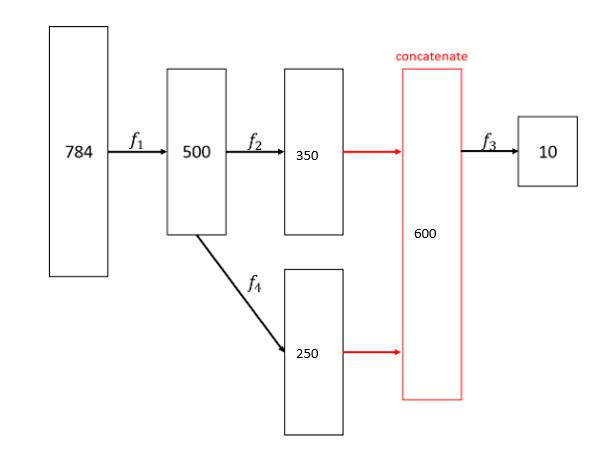

In [154]:
from IPython.display import Image
Image(filename="c:/users/haha0/desktop/圖片1.png")

In [155]:
model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

In [156]:
history = model.fit(X_train, y_train, 
          batch_size=256, 
          epochs=25,
         validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0339 - accuracy: 0.7548 - val_loss: 0.0249 - val_accuracy: 0.8262
Epoch 2/25
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0224 - accuracy: 0.8440 - val_loss: 0.0238 - val_accuracy: 0.8313
Epoch 3/25
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0204 - accuracy: 0.8581 - val_loss: 0.0217 - val_accuracy: 0.8492
Epoch 4/25
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0193 - accuracy: 0.8674 - val_loss: 0.0210 - val_accuracy: 0.8543
Epoch 5/25
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0183 - accuracy: 0.8744 - val_loss: 0.0199 - val_accuracy: 0.8617
Epoch 6/25
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0175 - accuracy: 0.8793 - val_loss: 0.0204 - val_accuracy: 0.8611
Epoch 7/25
60000/60000 [==============================] 

In [157]:
model.save_weights('MNIST_Model.h5')

In [158]:
score = model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 1s 18us/sample - loss: 0.0114 - accuracy: 0.9244
Loss: 0.011390875869741043
準確率: 92.44333505630493


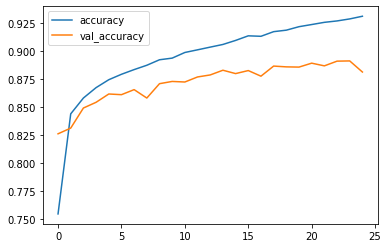

In [159]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

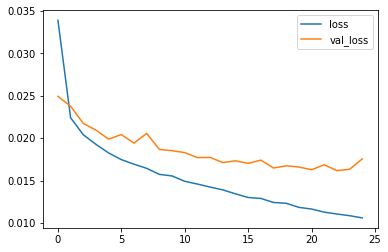

In [160]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()